In [1]:
import pandas as pd

In [2]:
# HoBo
df_oo = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/데이터 확인 과정/train_hobosd.csv')

# test = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/test_oom.csv')

In [3]:
# 함수 만들기
def label_encoder(df) :
  # 라이브러리 불러오기
  from sklearn.preprocessing import LabelEncoder
  # 인코딩할 칼럼 추출
  df_categorical = df.select_dtypes(include=['object']).columns
  # 식별자 ID 제외하기
  df_categorical = df_categorical.drop('ID')
  # 라벨 인코딩 적용
  label_encoder = LabelEncoder()
  df[df_categorical] = df[df_categorical].apply(label_encoder.fit_transform)

In [4]:
label_encoder(df_oo)

In [5]:
# # # features와 label 분리 작업 + 연령대로 머신러닝
X_features = df_oo.loc[:,(df_oo.columns != 'ID') & (df_oo.columns != 'Income')]
y_label = df_oo['Income']

In [6]:
# train_ test분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 42)

In [7]:
# 평가지표
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
import numpy as np

def evaluation(y_test, y_pred) :
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  # MdAPE를 잘 쓰곤 함. 직관적이여서(외부공유)
  mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100
  mape = mean_absolute_percentage_error(y_test,y_pred)
  print('rmse : {}, mae : {}, mdape : {}, mape : {}'.format(rmse, mae, mdape, mape ))

## Xgb

In [8]:
# xgboost
from xgboost import XGBRegressor
import xgboost as xgb
# 모델
xgb_model = XGBRegressor()
# 학습
xgb_model.fit(X_train, y_train,)
# 예측
xgb_pred = xgb_model.predict(X_test)
# 평가
evaluation(y_test, xgb_pred)

rmse : 612.696178543301, mae : 344.22065149119334, mdape : 63.47587768015745, mape : 6.307625637901668e+17


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

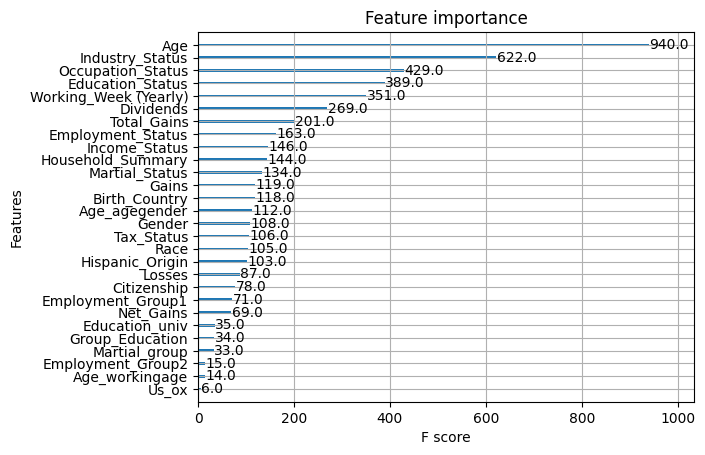

In [9]:
# feature 중요도 시각화
xgb.plot_importance(xgb_model)

In [10]:
importance = xgb_model.get_booster().get_score(importance_type='weight')
print(importance)

{'Age': 940.0, 'Gender': 108.0, 'Education_Status': 389.0, 'Employment_Status': 163.0, 'Working_Week (Yearly)': 351.0, 'Industry_Status': 622.0, 'Occupation_Status': 429.0, 'Race': 105.0, 'Hispanic_Origin': 103.0, 'Martial_Status': 134.0, 'Household_Summary': 144.0, 'Citizenship': 78.0, 'Birth_Country': 118.0, 'Tax_Status': 106.0, 'Gains': 119.0, 'Losses': 87.0, 'Dividends': 269.0, 'Income_Status': 146.0, 'Us_ox': 6.0, 'Total_Gains': 201.0, 'Net_Gains': 69.0, 'Age_workingage': 14.0, 'Age_agegender': 112.0, 'Education_univ': 35.0, 'Group_Education': 34.0, 'Employment_Group1': 71.0, 'Employment_Group2': 15.0, 'Martial_group': 33.0}


In [28]:
# 딕셔너리의 키(key)와 값(value) 추출
keys = list(importance.keys())
values = list(importance.values())

# 데이터프레임으로 변환
df_feature = pd.DataFrame({'Key': keys, 'Value': values})

In [31]:
# 내림차순 정렬
df_feature = df_feature.sort_values(by = 'Value', ascending = False)

In [ ]:
# feature importance 순서대로 추출
fe_list = list(df_feature['Value'])

In [ ]:
n = 32
while n > 0 :
  X_f = df_oo[fe_list[:n]]
  from sklearn.model_selection import train_test_split
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X_f, y_label, test_size = 0.2, random_state = 42)
  # 모델
  xgb_model = XGBRegressor()
  # 학습
  xgb_model.fit(X_train, y_train,)
  # 예측
  xgb_pred = xgb_model.predict(X_test)
  # 평가
  print( '{} 번째'.format(n))
  print(fe_list[n:])
  evaluation(y_test, xgb_pred)
  n = n - 1

In [ ]:
# # 중요도에 따른 피처 추출
# fi = lgbm_model.feature_importances_
# df_col = X_train.columns
# fi_list = []
# for i in range(len(fi)):
#   if fi[i] >= 0:
#     fi_list.append(df_col[i])
#   else :
#     continue

In [ ]:
# fi_list

In [ ]:
X_features2 = df_oo[fe_list]

In [ ]:
# train_ test분리
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_features2, y_label, test_size = 0.2, random_state = 42)

In [ ]:
# 모델
xgb_model2 = XGBRegressor()
# 학습
xgb_model2.fit(X_train2, y_train2)
# 예측
xgb_pred2 = xgb_model2.predict(X_test2)
# 평가
evaluation(y_test2, xgb_pred2)

rmse : 616.5688613595149, mae : 344.8597906368412, mdape : 65.81711914960076, mape : 6.309332561458344e+17


In [ ]:
# ['Age_range', 'Native_yn', 'Allother_yn', 'Race_yn'] feature importance == 0

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

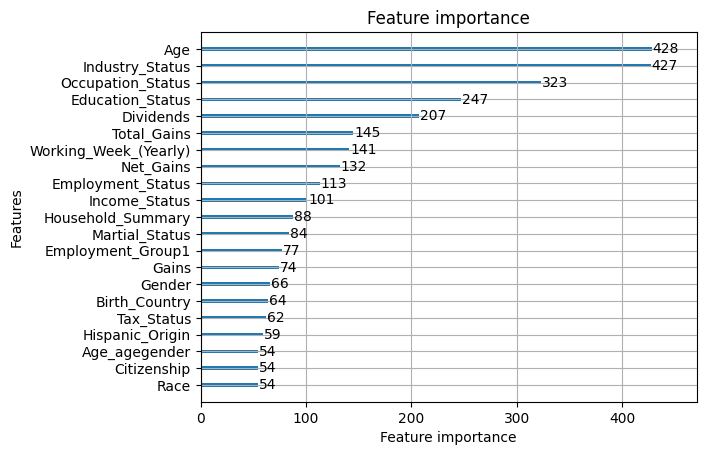

In [ ]:
lgbm.plot_importance(lgbm_model2)

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
xgb_model3 = XGBRegressor()

rfe = RFE(estimator=xgb_model3, n_features_to_select=24)

In [ ]:
# RFE를 사용하여 특성 선택
X_selected = rfe.fit_transform(X_train, y_train)

# 선택된 특성 확인
selected_features = rfe.support_
print("선택된 특성:", selected_features)

# 선택된 특성만 사용하여 모델 재학습
xgb_model3.fit(X_selected, y_train)

# 모델 평가
score = xgb_model3.score(X_selected, y_train)
print("모델 평가 점수:", score)

선택된 특성: [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True False  True False  True  True
 False  True  True  True False False False False]
모델 평가 점수: 0.645640276951245


In [ ]:
selected_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False, False, False, False])

In [ ]:
# 중요도에 따른 피처 추출
df_col = X_train.columns
fe_list = []
for i in range(len(selected_features)):
  if selected_features[i] == 1:
    fe_list.append(df_col[i])
  else :
    continue

In [ ]:
fe_list

['Age',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Working_Week (Yearly)',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Summary',
 'Citizenship',
 'Tax_Status',
 'Gains',
 'Losses',
 'Dividends',
 'Income_Status',
 'Us_ox',
 'Total_Gains',
 'Age_workingage',
 'Age_agegender',
 'Group_Education',
 'Employment_Group1',
 'Employment_Group2']

In [ ]:
'Employment_Status', 'Household_Summary', 'Birth_Country', 'Tax_Status', 'Gains', 'Us_ox', 'Age_range', 'Total_Gains', 'Net_Gains', 'Age_agegender', 'Education_univ', 'Employment_Group1', 'Martial_group', 'Native_yn', 'Allother_yn', 'Race_yn'